# SVM(Support Vector Machine, 서포트 벡터 머신)
---
**서포트 벡터 머신**(Support Vector Machine, SVM): SVM의 최적화 대상은 **마진**을 최대화하는 것
- 마진: 클래스를 구분하는 초평면(결정 경계)과 이 초평면에 가장 가까운 훈련 <U>샘플</U> 사이의 거리로 정의
- 서포트 벡터(Support Vector): <U>샘플</U>

# 이진 분류(Binary classification) 실습
---
**데이터셋**: iris(붓꽃 데이터셋)
- Iris-setosa, Iris-versicolor, Iris-virginica 세 종류 150개의 붓꽃 샘플

**이진 분류**(Binary classification)

**SVM**(Support Vector Machine, 서포트 벡터 머신)

### 필요한 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import myutils as my # myutils.py 파일

### 데이터 준비 & 전처리

In [ ]:
# !gdown https://raw.githubusercontent.com/devdio/datasets/main/iris.csv

Downloading...
From: https://raw.githubusercontent.com/devdio/datasets/main/iris.csv
To: /content/iris.csv
5.11kB [00:00, 4.01MB/s]       


In [ ]:
X_train, X_test, y_train, y_test = my.get_iris(mode='bin')
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(80, 4) (20, 4)
(80,) (20,)


### 피처 스케일링(feature scaling)
- 표준화(StandardScaler)
- 최소-최대 정규화(MinMaxScaler)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
y_train = y_train.values

### 학습

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train_s, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# kernel='linear'일 때 w1, w2, w3, w4
clf.coef_

array([[ 0.40659119, -1.12395057,  1.81421534,  1.53207402]])

In [ ]:
# kernel='linear'일 때 b
clf.intercept_

array([-0.99490205])

### 평가

In [ ]:
clf.score(X_train_s, y_train)

1.0

### 예측

In [ ]:
X_test_s = scaler.transform(X_test)
y_test = y_test.values

In [ ]:
clf.score(X_test_s, y_test)

1.0

In [ ]:
y_pred = clf.predict(X_test_s)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

- **성능 평가**

In [ ]:
my.print_score(y_test, y_pred, average='binary')

accuracy: 1.0
precision: 1.0
recall: 1.0


- **혼동 행렬**(confusion matrix)

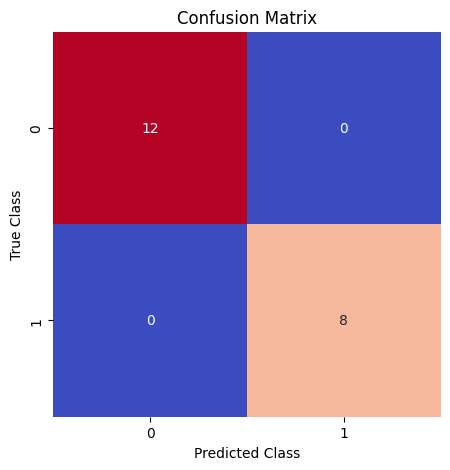

In [ ]:
my.plot_confusion_matrix(y_test, y_pred)

# 다중 분류(Multiclass Classification) 실습
---
**데이터셋**: iris(붓꽃 데이터셋)
- Iris-setosa, Iris-versicolor, Iris-virginica 세 종류 150개의 붓꽃 샘플

**다중 분류**(Multiclass Classification)

**SVM**(Support Vector Machine, 서포트 벡터 머신)

### 데이터 준비 & 전처리

In [ ]:
X_train, X_test, y_train, y_test = my.get_iris()
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


### 피처 스케일링(feature scaling)
- 표준화(StandardScaler)
- 최소-최대 정규화(MinMaxScaler)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
y_train = y_train.values

### 학습

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train_s, y_train)

SVC(kernel='linear', random_state=42)

### 평가

In [ ]:
clf.score(X_train_s, y_train)

0.9833333333333333

### 예측

In [ ]:
X_test_s = scaler.transform(X_test)
y_test = y_test.values

In [ ]:
y_pred = clf.predict(X_test_s)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

- **성능 평가**

In [ ]:
my.print_score(y_test, y_pred, average='macro')

accuracy: 0.9666666666666667
precision: 0.9722222222222222
recall: 0.9629629629629629


- **혼동 행렬**(confusion matrix)

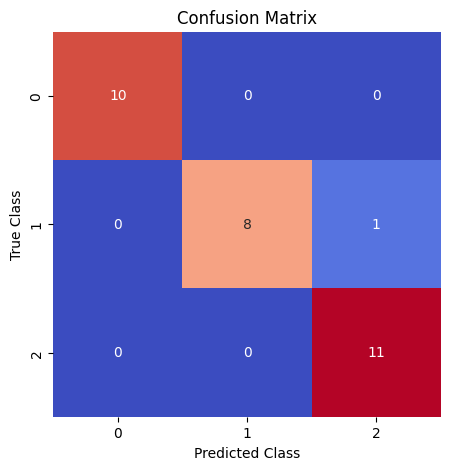

In [ ]:
my.plot_confusion_matrix(y_test, y_pred)

### 베스트 모델 찾기
---

### 데이터 준비 & 전처리

In [ ]:
X_train, X_test, y_train, y_test = my.get_iris()
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


### 피처 스케일링(feature scaling)
- 표준화(StandardScaler)
- 최소-최대 정규화(MinMaxScaler)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
y_train = y_train.values

In [ ]:
type(X_train_s), type(y_train)

(numpy.ndarray, numpy.ndarray)

### 모델 비교

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
names = ['linear', 'linearSVC', 'poly', 'rbf', 'knn-5', 'knn-9']

models = [
    SVC(kernel='linear', C=1), 
    LinearSVC(C=1, max_iter=1000), 
    SVC(kernel='poly', degree=3), 
    SVC(kernel='rbf', C=1, gamma=0.7), 
    KNeighborsClassifier(n_neighbors=5), 
    KNeighborsClassifier(n_neighbors=9)
]

scores = {}
for name, model in zip(names, models):
    model.fit(X_train_s, y_train)
    score = model.score(X_train_s, y_train)
    print(name, score)
    scores[name] = score

linear 0.9583333333333334
linearSVC 0.9416666666666667
poly 0.9833333333333333
rbf 0.9666666666666667
knn-5 0.9583333333333334
knn-9 0.9666666666666667


### 하이퍼파라미터 최적화
- 그리드 서치(GridSearchCV)
- 랜덤 서치(RandomizedSearchCV)

**그리드 서치**(GridSearchCV)

In [ ]:
param_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

params = [
    {
        'C': param_range, 
     'gamma': param_range, 
     'kernel': ['rbf']
    }, 
    {
        'C': param_range, 
     'kernel': ['linear']
    }, 
    {
        'C': param_range, 
     'degree': [2, 3], 
     'kernel': ['poly']
    }
]

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = SVC(random_state=42)

gs = GridSearchCV(estimator=clf, 
                  param_grid=params, 
                  scoring='accuracy', 
                  cv=3, 
                  n_jobs=-1, 
                  verbose=3
                  )
gs.fit(X_train_s, y_train)

Fitting 3 folds for each of 70 candidates, totalling 210 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['linear']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'degree': [2, 3], 'kernel': ['poly']}],
             scoring='accuracy', verbose=3)

In [ ]:
gs.best_estimator_

SVC(C=10, gamma=0.1, random_state=42)

In [ ]:
gs.best_score_

0.9583333333333334

In [ ]:
gs.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

**랜덤 서치**(RandomizedSearchCV)

In [ ]:
param_range = np.arange(0.001, 1000, 0.5)

params = [
    {
        'C': param_range, 
     'gamma': param_range, 
     'kernel': ['rbf']
    }, 
    {
        'C': param_range, 
     'kernel': ['linear']
    }, 
    {
        'C': param_range, 
     'degree': [2, 3], 
     'kernel': ['poly']
    }
]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

clf = SVC(random_state=42)

rs = RandomizedSearchCV(estimator=clf, 
                        param_distributions=params, 
                        scoring='accuracy', 
                        n_iter=100, 
                        cv=3, 
                        n_jobs=-1, 
                        verbose=3, 
                        random_state=42
                        )
rs.fit(X_train_s, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=SVC(random_state=42), n_iter=100, n_jobs=-1,
                   param_distributions=[{'C': array([1.00000e-03, 5.01000e-01, 1.00100e+00, ..., 9.98501e+02,
       9.99001e+02, 9.99501e+02]),
                                         'gamma': array([1.00000e-03, 5.01000e-01, 1.00100e+00, ..., 9.98501e+02,
       9.99001e+02, 9.99501e+02]),
                                         'kernel': ['rbf']},
                                        {'C': array([1.00000e-03, 5.01000e-01, 1.00100e+00, ..., 9.98501e+02,
       9.99001e+02, 9.99501e+02]),
                                         'kernel': ['linear']},
                                        {'C': array([1.00000e-03, 5.01000e-01, 1.00100e+00, ..., 9.98501e+02,
       9.99001e+02, 9.99501e+02]),
                                         'degree': [2, 3],
                                         'kernel': ['poly']}],
                   random_state=42, scoring='accuracy', verbose=3)

In [ ]:
rs.best_estimator_

SVC(C=183.001, gamma=90.001, random_state=42)

In [ ]:
rs.best_score_

0.9500000000000001

In [ ]:
rs.best_params_

{'kernel': 'rbf', 'gamma': 90.001, 'C': 183.001}

### 학습
- **그리드 서치**(GridSearchCV)로 찾은 최적 파라미터를 사용

In [ ]:
clf = SVC(C=10, gamma=0.1, kernel='rbf', random_state=42)
clf.fit(X_train_s, y_train)

SVC(C=10, gamma=0.1, random_state=42)

### 평가

In [ ]:
clf.score(X_train_s, y_train)

0.975

### 예측

In [ ]:
X_test_s = scaler.transform(X_test)
y_test = y_test.values

In [ ]:
clf.score(X_test_s, y_test)

1.0

In [ ]:
y_pred = clf.predict(X_test_s)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

- **성능 평가**

In [ ]:
my.print_score(y_test, y_pred, average='macro')

accuracy: 1.0
precision: 1.0
recall: 1.0


- **혼동 행렬**(confusion matrix)

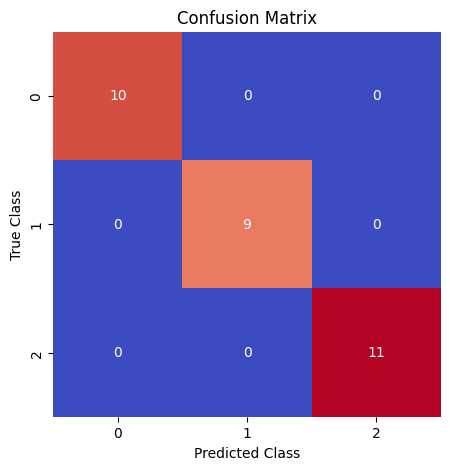

In [ ]:
my.plot_confusion_matrix(y_test, y_pred)